<a href="https://colab.research.google.com/github/ashu433/Machine-Learning-Book-Practice-Q-A/blob/main/Chapter_4_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X=2*np.random.rand(100,1)
Y=4+3*X+np.random.rand(100,1)

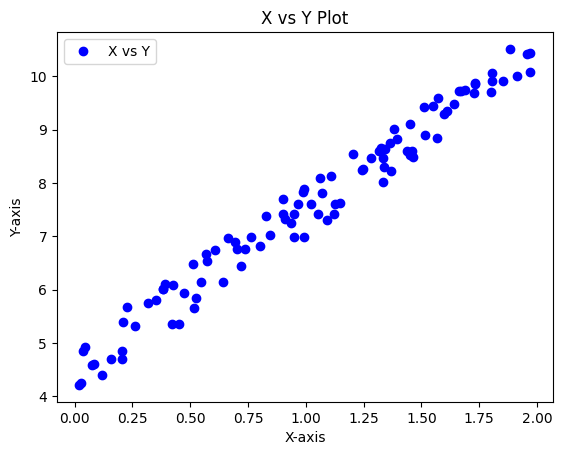

In [3]:
plt.plot(X,Y, marker='o',linestyle='', color='b', label="X vs Y")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("X vs Y Plot")
plt.legend()

# Show Plot
plt.show()

In [4]:
X_c=np.c_[np.ones((100,1)),X]

In [5]:
X_c.shape

(100, 2)

# **Linear regression using Normal Equation**

In [6]:
theta=np.linalg.inv(X_c.T.dot(X_c)).dot(X_c.T).dot(Y)

In [7]:
Y_predicted=np.dot(X_c,theta)

In [8]:
Y_predicted.shape

(100, 1)

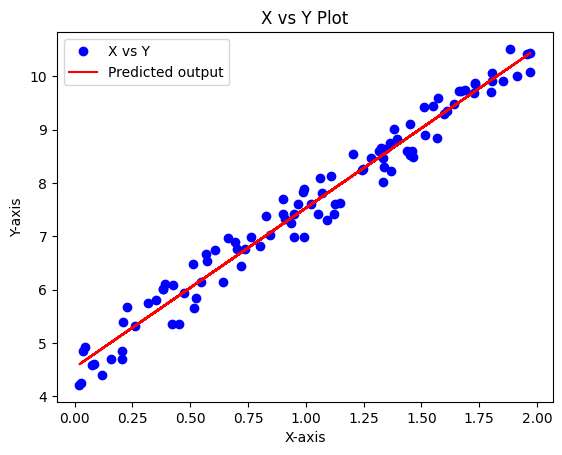

In [9]:
plt.plot(X,Y, marker='o',linestyle='', color='b', label="X vs Y")
plt.plot(X,Y_predicted, color='r', label="Predicted output")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("X vs Y Plot")
plt.legend()

# Show Plot
plt.show()

# **Linear Regression using sklearn**

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
linear_predict=LinearRegression()
linear_predict.fit(X,Y)

LinearRegression()

In [12]:
linear_predict.intercept_,linear_predict.coef_

(array([4.5372508]), array([[2.9920995]]))

# **Linear Regression using SVD**

In [13]:
np.linalg.pinv(X_c).dot(Y)

array([[4.5372508],
       [2.9920995]])

# **Batch Gradient Descent**

In [14]:
eta=0.1
n_itteration=1000
m=100

theta=np.random.randn(2,1)
print(theta)

for i in range(n_itteration):
  MSE=(2/m)*X_c.T.dot(X_c.dot(theta)-Y)
  theta=theta-eta*MSE

[[ 1.10297099]
 [-0.38608407]]


In [15]:
theta

array([[4.5372508],
       [2.9920995]])

In [16]:
Y_predicted=np.dot(X_c,theta)

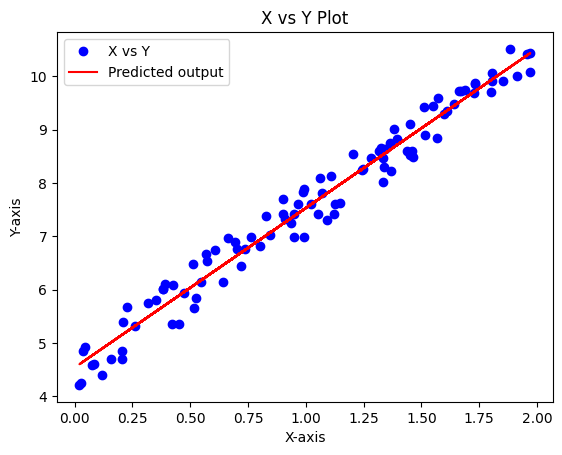

In [17]:
plt.plot(X,Y, marker='o',linestyle='', color='b', label="X vs Y")
plt.plot(X,Y_predicted, color='r', label="Predicted output")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("X vs Y Plot")
plt.legend()

# Show Plot
plt.show()

# **Stochastic Gradient Descent Manual way**

In [18]:
n_epochs=50
t_0,t_1=5,50
m=100

def learning_schedule(t):
  return t_0/(t+t_1)

theta=np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index=np.random.randint(m)
    X_i=X_c[random_index:random_index+1]
    Y_i=Y[random_index:random_index+1]
    MSE=2*X_i.T.dot(X_i.dot(theta)-Y_i)
    eta=learning_schedule(epoch*m+i)
    theta=theta-eta*MSE

In [19]:
theta

array([[4.53128416],
       [2.9942788 ]])

# **Stochastic Gradient Descent using sklearn**

In [20]:
from sklearn.linear_model import SGDRegressor

In [21]:
sgd_reg=SGDRegressor(max_iter=10000,tol=1e-3,penalty=None,eta0=0.1)

sgd_reg.fit(X,Y.ravel())

SGDRegressor(eta0=0.1, max_iter=10000, penalty=None)

In [22]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.51828969]), array([3.0102332]))

# **Mini batch Gradient Descent using sklearn**

In [23]:
X_c[4:8]

array([[1.        , 1.4623277 ],
       [1.        , 1.56767382],
       [1.        , 1.51592054],
       [1.        , 1.31805992]])

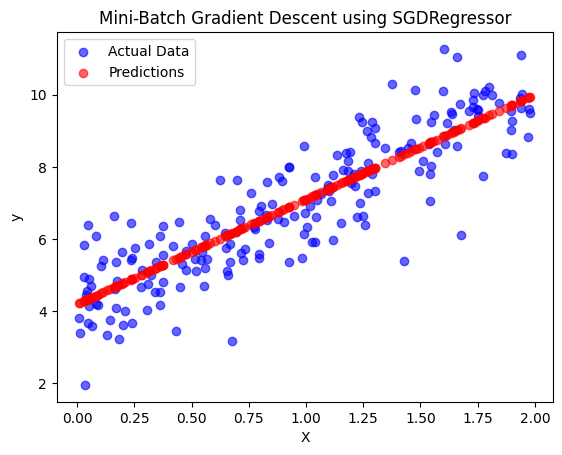

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic data (Linear Regression example)
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)  # Feature
y = 4 + 3 * X + np.random.randn(1000, 1)  # Linear equation with noise

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Mini-Batch SGD Regressor
sgd_reg = SGDRegressor(max_iter=1, eta0=0.01, learning_rate="invscaling", tol=None, random_state=42)

# Mini-Batch Gradient Descent Training
batch_size = 32
n_epochs = 100  # Number of passes over data

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(len(X_train_scaled))
    X_train_shuffled = X_train_scaled[shuffled_indices]
    y_train_shuffled = y_train[shuffled_indices]

    for i in range(0, len(X_train_scaled), batch_size):
        X_mini_batch = X_train_shuffled[i:i + batch_size]
        y_mini_batch = y_train_shuffled[i:i + batch_size]

        sgd_reg.partial_fit(X_mini_batch, y_mini_batch.ravel())  # Mini-Batch Training

# Predictions
y_pred = sgd_reg.predict(X_test_scaled)

# Plot results
plt.scatter(X_test, y_test, label="Actual Data", color="blue", alpha=0.6)
plt.scatter(X_test, y_pred, label="Predictions", color="red", alpha=0.6)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Mini-Batch Gradient Descent using SGDRegressor")
plt.show()


# **Polynomial Regression**

In [25]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

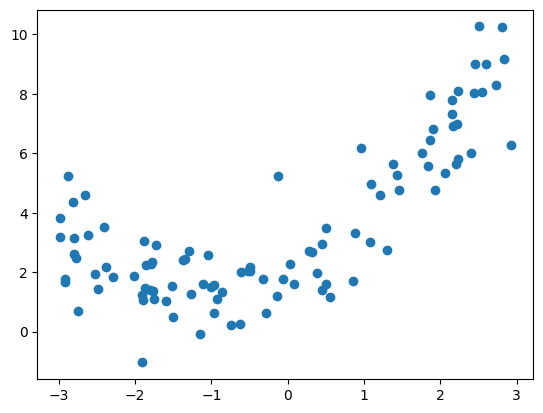

In [26]:
plt.scatter(X,y)

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X)

In [29]:
linear_reg=LinearRegression()
linear_reg.fit(X_poly,y)

LinearRegression()

In [30]:
linear_reg.intercept_,linear_reg.coef_

(array([2.05644401]), array([[0.        , 1.11714097, 0.50304205]]))

# **Learning Curve**

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [32]:
def plot_validation_training_loss(model,X,y):
  X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=40)
  training_error=[]
  validation_error=[]
  for m in range(1,len(X_train)):
    X_train_seg=X_train[:m]
    Y_train_seg=Y_train[:m]
    model.fit(X_train_seg,Y_train_seg)
    Y_predicted_test=model.predict(X_test)
    Y_predicted_train=model.predict(X_train_seg)
    training_error.append(mean_squared_error(Y_train_seg,Y_predicted_train))
    validation_error.append(mean_squared_error(Y_test,Y_predicted_test))

  plt.plot(np.sqrt(training_error), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(validation_error), "b-", linewidth=3, label="val")
  plt.ylim(0, 3)
  plt.legend()
  plt.show()

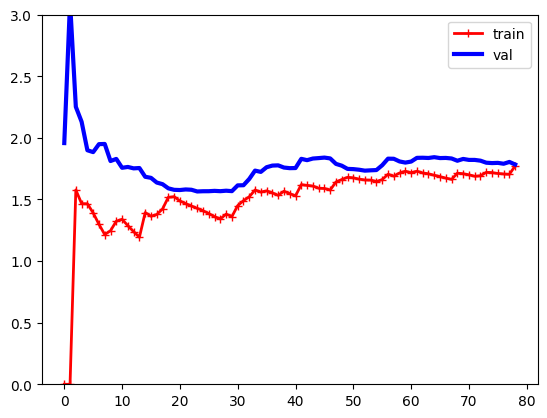

In [33]:
lin_reg=LinearRegression()
plot_validation_training_loss(lin_reg,X,y)

In [34]:
from sklearn.pipeline import Pipeline

In [35]:
ploynimial_pipeline=Pipeline([("Polynomial features",PolynomialFeatures(degree=10,include_bias=False)),("Linear_reg",LinearRegression()),])

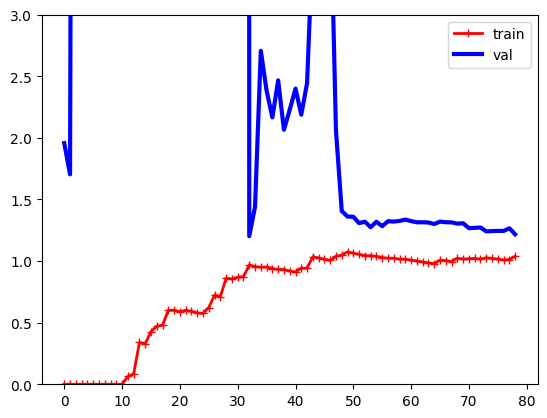

In [36]:
plot_validation_training_loss(ploynimial_pipeline,X,y)

# **Regulirization**

## Ridge Regulirization

In [37]:
from sklearn.linear_model import Ridge

ridge_regu=Ridge(alpha=1,solver="cholesky")
ridge_regu.fit(X,Y)

Ridge(alpha=1, solver='cholesky')

In [38]:
ridge_regu.predict([[1.5]])

array([7.74925103])

In [39]:
sgd_reg=SGDRegressor(penalty="l2")
sgd_reg.fit(X,Y.ravel())

SGDRegressor()

In [40]:
sgd_reg.predict([[1.5]])

array([7.72108576])

Lasso Regulirization

In [41]:
sgd_reg=SGDRegressor(penalty="l1")
sgd_reg.fit(X,Y.ravel())

SGDRegressor(penalty='l1')

In [42]:
sgd_reg.predict([[1.5]])

array([7.73025049])

In [43]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, Y)
lasso_reg.predict([[1.5]])

array([7.6979617])

Elastic Net Regulirization

In [44]:
from sklearn.linear_model import ElasticNet

elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,Y)
elastic_net.predict([[1.5]])

array([7.72155135])

# **Early Stopping**

In [45]:
poly_scalar=Pipeline([("poly_features",PolynomialFeatures(degree=90,include_bias=False)),("Scaling",StandardScaler())])

In [47]:
X_train_poly_scaled=poly_scalar.fit_transform(X_train)
X_val_scaled=poly_scalar.fit_transform(X_test)

In [49]:
n_epochs=1000
minimum_error=float("inf")

In [53]:
sgd_reg = SGDRegressor(max_iter=1, tol=0.0000001, warm_start=True,
penalty=None, learning_rate="constant", eta0=0.0005)

In [54]:
validation_error=[]
training_error_list=[]
for i in range(n_epochs):
  sgd_reg.fit(X_train_poly_scaled,y_train)
  y_predicted_val=sgd_reg.predict(X_val_scaled)
  y_predicted_val_train=sgd_reg.predict(X_train_poly_scaled)

  val_error=mean_squared_error(y_test,y_predicted_val)
  training_error=mean_squared_error(y_train,y_predicted_val_train)

  validation_error.append(val_error)
  training_error_list.append(training_error)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/loc

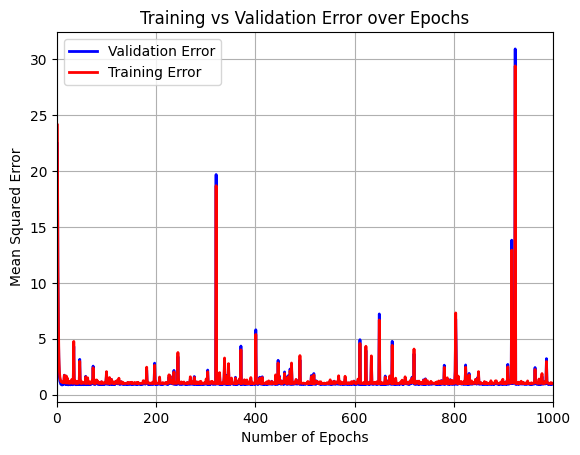

In [64]:
epochs = range(1, n_epochs + 1)

plt.plot(epochs, validation_error, "b-", label="Validation Error", linewidth=2)
plt.plot(epochs, training_error_list, "r-", label="Training Error", linewidth=2)
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.xlim(0,1000)
plt.title("Training vs Validation Error over Epochs")
plt.legend()
plt.grid(True)
plt.show()

# **Logistic Regression**

In [75]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [66]:
data_iris=datasets.load_iris()
data_iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [74]:
X = data_iris["data"][:, 3:]
Y=(data_iris['target']==2).astype(int)

In [76]:
log_reg=LogisticRegression()
log_reg.fit(X,Y)

LogisticRegression()

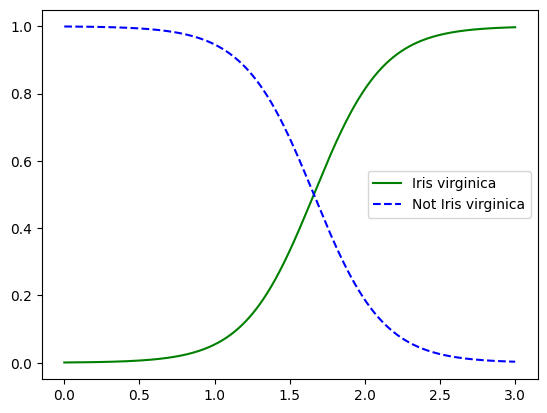

In [78]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.legend()
plt.show()

In [79]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

# **Softmax Regression**

In [82]:
X = data_iris["data"][:, (2, 3)]
Y = data_iris["target"]

In [83]:
soft_max_reg=LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
soft_max_reg.fit(X,Y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [84]:
soft_max_reg.predict([[5,2]])

array([2])

In [85]:
soft_max_reg.predict_proba([[5,2]])

array([[6.21626375e-07, 5.73689803e-02, 9.42630398e-01]])